In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# This notebook contains the plots used in the presentation for GDDFest 2019

Image size: (512, 512)


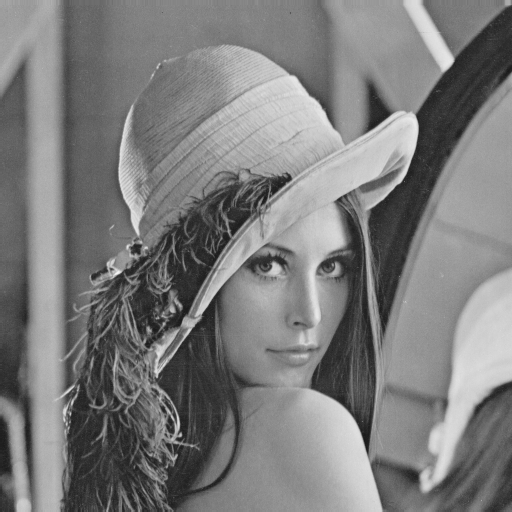

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9
from PIL import Image

import jpeg.freq


image_path = Path('..', 'images', 'lena512.bmp')
image = Image.open(image_path)

print('Image size:', image.size)
image

In [3]:
im = np.array(image.getdata()).reshape(image.size[::-1] + (-1,))
# Ignore the alpha channel
im = im[:, :, :3].mean(axis=2)

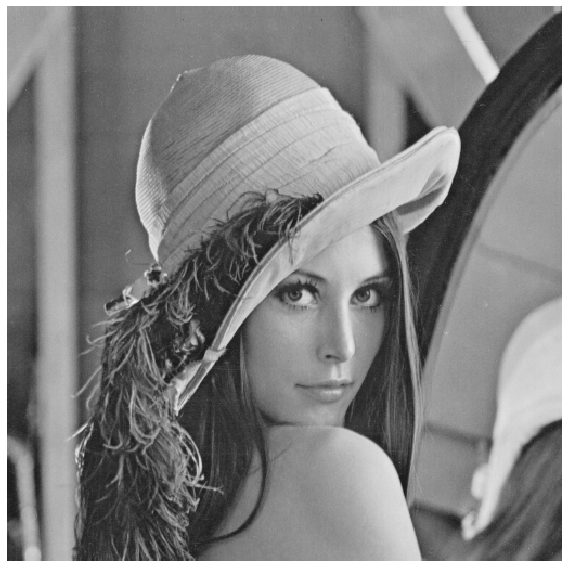

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena.png'))

# Naive compression

Reduce the range in pixel values.

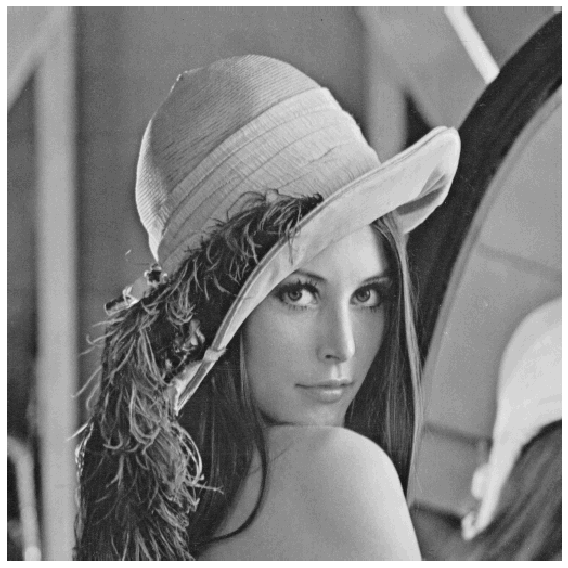

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
division = 2 ** 3 
ax.imshow((im / division).astype(int), vmin=0, vmax=int(255 / division), cmap='gray')
ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', f'lena-pixels-{division}.png'))

Select the upper right quarter of an image.

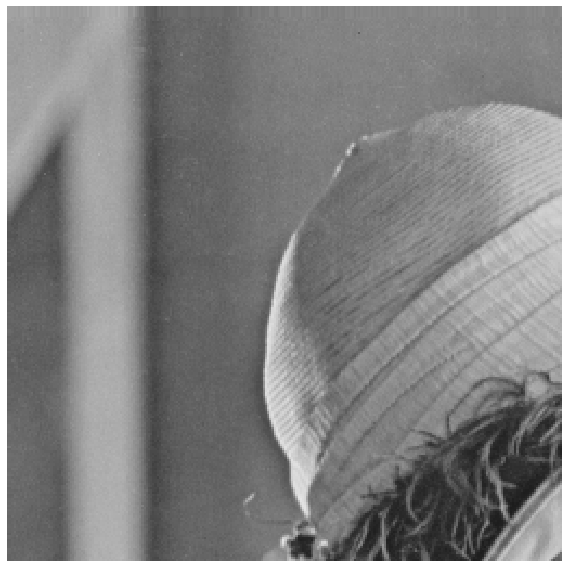

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
h, w = int(im.shape[0] / 2), int(im.shape[1] / 2)
ax.imshow(im[:h, :w], vmin=0, vmax=255, cmap='gray')
ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena-quarter.png'))

# Histogram of pixel values

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 104'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


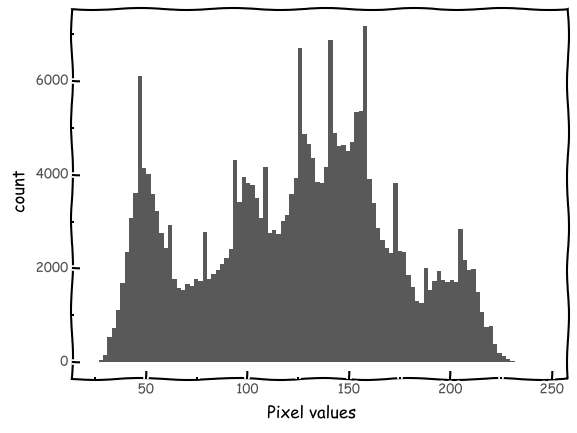

<ggplot: (324244665)>

In [7]:
plotr = pd.DataFrame({'values': im.flatten()}, index=range(len(im.flatten())))
(
    p9.ggplot()
    + p9.geom_histogram(data=plotr, mapping=p9.aes('values'))
    + p9.theme_xkcd()
    + p9.labels.xlab('Pixel values')
)#.save(Path('..', 'images', 'lena-pixel-values-hist.png'))

# Wave

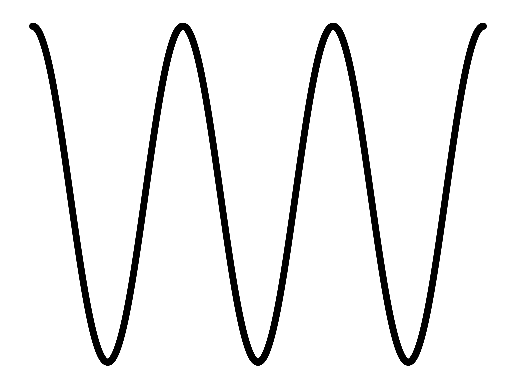

<ggplot: (324242589)>

In [8]:
x = np.linspace(0, 1, 10_000)
f = 3
plotr = pd.DataFrame({
    'x': x,
    'y': np.cos(x * f * 2 * np.pi)
})

(
    p9.ggplot()
    + p9.geom_jitter(plotr, p9.aes(x='x', y='y'))
    + p9.theme_void()
)#.save(Path('..', 'images', f'wave-{f}.png'))

# Filters

Image filters

In [9]:
def matshow(patch, vmin=None, vmax=None, round_digits=1, threshold=0):
    vmin = vmin or patch.min()
    vmax = vmax or patch.max()
    
    tile_height = tile_width = 0.95

    nrows = 1
    hshift = 0
    vshift = 0.5 * tile_height

    plotr = pd.DataFrame({
        'x': np.tile(np.arange(patch.shape[1]), patch.shape[0]).flatten() + hshift,
        'y': - np.repeat(np.arange(patch.shape[0]), patch.shape[1]).flatten() + vshift,
        'value': np.round(patch.flatten(), round_digits),
        'color_text': patch.flatten() < threshold
    })

    return (
        p9.ggplot(p9.aes('x', 'y'))
        + p9.geom_tile(plotr, p9.aes(width=tile_width, height=tile_height))
        + p9.geom_text(plotr, p9.aes(label='value', color='color_text'))
        + p9.aes(fill='value')
        + p9.coord_equal(expand=False)
        + p9.theme_void()
        + p9.scales.scale_fill_gradient(high='#f0f0f0', low='#252525', guide=False)
        + p9.scales.scale_color_gray(breaks=[False, True], guide=False)
    )

## One-dimensional

In [10]:
dct_cos = lambda x, u: np.cos(((2 * x + 1) * u * np.pi) / 16)

spatial_frequency = 7
for spatial_frequency in range(9):
    dct_values = dct_cos(np.arange(8), spatial_frequency).reshape(1, 8)

    matshow(dct_values, vmin=-1, vmax=1).save(Path('..', 'images', f'dct_1d_{spatial_frequency}.png'))

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_1d_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_1d_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot

## Two-dimensional

In [11]:
dct_cos = lambda x, u: np.cos(((2 * x + 1) * u * np.pi) / 16)

hor_spatial_frequency = 3
ver_spatial_frequency = 6
for hor_spatial_frequency in range(9):
    for ver_spatial_frequency in range(9):
        hor_dct_values = dct_cos(np.arange(8), hor_spatial_frequency).reshape(1, 8)
        ver_dct_values = dct_cos(np.arange(8), ver_spatial_frequency).reshape(8, 1)
        dct_values = np.outer(ver_dct_values, hor_dct_values)

        matshow(dct_values, vmin=-1, vmax=1).save(Path('..', 'images', f'dct_2d_{hor_spatial_frequency}_{ver_spatial_frequency}.png'))

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_2d_0_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_2d_0_1.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/gg

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_2d_2_4.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_2d_2_5.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/gg

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_2d_4_8.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_2d_5_0.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/gg

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_2d_7_3.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/dct_2d_7_4.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/gg

# Image DCT and compression

In [12]:
quantization = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61], 
    [12, 12, 14, 19, 26, 58, 60, 55], 
    [14, 13, 16, 24, 40, 57, 69, 56], 
    [14, 17, 22, 29, 51, 87, 80, 62], 
    [18, 22, 37, 56, 68, 109, 103, 77], 
    [24, 35, 55, 64, 81, 104, 113, 92], 
    [49, 64, 78, 87, 103, 121, 120, 101], 
    [72, 92, 95, 98, 112, 100, 103, 99], 
])

# quantization = 1
decompressed_im = np.zeros(im.shape)
compressed_im = np.zeros(im.shape)

shifted_im = im - 128

for v in range(0, decompressed_im.shape[0], 8):
    print(v, end=' -> ')
    for u in range(0, decompressed_im.shape[1], 8):
        
        patch = shifted_im[v: v + 8, u: u + 8]
        dct = (jpeg.freq.dct(patch) / quantization).astype(int)
        compressed_im[v: v + 8, u: u + 8] = dct
        decompressed_im[v: v + 8, u: u + 8] = jpeg.freq.idct(dct * quantization)
        
decompressed_im += 128
print('finished')

0 -> 8 -> 16 -> 24 -> 32 -> 40 -> 48 -> 56 -> 64 -> 72 -> 80 -> 88 -> 96 -> 104 -> 112 -> 120 -> 128 -> 136 -> 144 -> 152 -> 160 -> 168 -> 176 -> 184 -> 192 -> 200 -> 208 -> 216 -> 224 -> 232 -> 240 -> 248 -> 256 -> 264 -> 272 -> 280 -> 288 -> 296 -> 304 -> 312 -> 320 -> 328 -> 336 -> 344 -> 352 -> 360 -> 368 -> 376 -> 384 -> 392 -> 400 -> 408 -> 416 -> 424 -> 432 -> 440 -> 448 -> 456 -> 464 -> 472 -> 480 -> 488 -> 496 -> 504 -> finished


In [13]:
def sliding_window(arr):
    for i in range(len(arr) - 1):
        yield arr[i: i + 2]

## Histogram of the frequency values

In [14]:
count, values = np.histogram(compressed_im, bins=30)
widths = [(w[1] - w[0]) * 0.8 for w in sliding_window(values)]
values = [w.mean() for w in sliding_window(values)]

plotr = pd.DataFrame({
    'x': values,
    'y': count,
    'width': widths
})

(
    p9.ggplot()
    + p9.geom_col(data=plotr, mapping=p9.aes(x='x', y='y', width='width'))
    + p9.theme_xkcd()
    + p9.xlab('frequency value')
    + p9.ylab('count')
).save(Path('..', 'images', 'lena-compressed-pixel-values-hist.png'))

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/lena-compressed-pixel-values-hist.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


# Encode compressed image

In [15]:
from jpeg import huffman

In [16]:
print('New image size is')
( 
    len(huffman.encode(compressed_im.astype(int).flatten()))
) / (8 * im.shape[0] * im.shape[1])

New image size is


0.14879369735717773

Compressed image

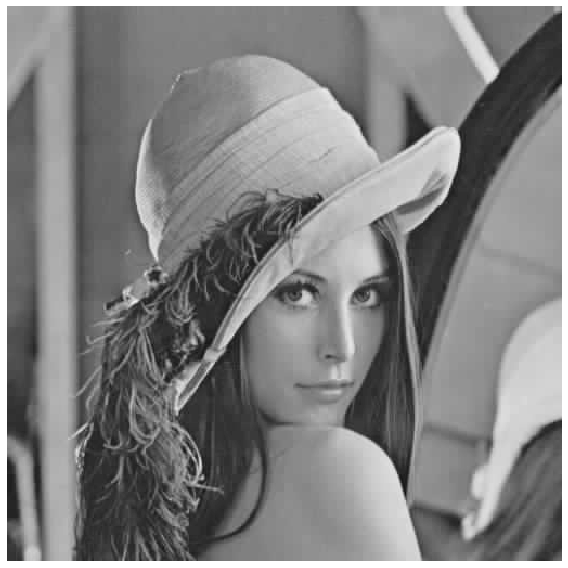

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(decompressed_im, vmin=0, vmax=255, cmap='gray')
ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena-jpg.png'))

# Quantization matrix

In [18]:
(
    matshow(quantization, threshold=quantization.mean())
#     + p9.theme_xkcd()
).save(Path('..', 'images', 'quantization.png'))

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/quantization.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


## All filters together

In [19]:
def two_d_dct(hor_spatial_frequency, ver_spatial_frequency):
    hor_dct_values = dct_cos(np.arange(8), hor_spatial_frequency).reshape(1, 8)
    ver_dct_values = dct_cos(np.arange(8), ver_spatial_frequency).reshape(8, 1)
    return np.outer(ver_dct_values, hor_dct_values)


two_d_dcts = [
    (hor_spatial_frequency, ver_spatial_frequency, two_d_dct(hor_spatial_frequency, ver_spatial_frequency))
    for hor_spatial_frequency in range(8)
    for ver_spatial_frequency in range(8)
]

tile_height = tile_width = 0.95
nrows = 1
hshift = 0
vshift = 0.5 * tile_height

plotr = pd.concat([
        pd.DataFrame({
        'x': np.tile(np.arange(patch.shape[1]), patch.shape[0]).flatten() + hshift,
        'y': - np.repeat(np.arange(patch.shape[0]), patch.shape[1]).flatten() + vshift,
        'value': np.round(patch.flatten(), 2),
        'color_text': patch.flatten() < 0,
        'hor_f': [hor_f] * len(patch.flatten()),
        'ver_f': [ver_f] * len(patch.flatten()),
    })
    for hor_f, ver_f, patch in two_d_dcts
])


# plotr = plotr.loc[lambda df: df['ver_f'] < 2].loc[lambda df: df['hor_f'] < 2]

(
    p9.ggplot(p9.aes('x', 'y'))
    + p9.geom_tile(plotr, p9.aes(width=tile_width, height=tile_height))
#     + p9.geom_text(plotr, p9.aes(label='value', color='color_text'))
    + p9.aes(fill='value')
    + p9.coord_equal(expand=False)
    + p9.theme_void()
    + p9.scales.scale_fill_gradient(high='#f0f0f0', low='#252525', guide=False)
    + p9.scales.scale_color_gray(breaks=[False, True], guide=False)
    + p9.facet_grid('ver_f ~ hor_f', labeller=lambda *args, **kwargs: '')
    
    + p9.theme(
        panel_spacing=0.1,
    )
).save(Path('..', 'images', 'all-filters.png'))

/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/cor/.virtualenvs/pyjpeg/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../images/all-filters.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


# Original and compressed image side-by-side

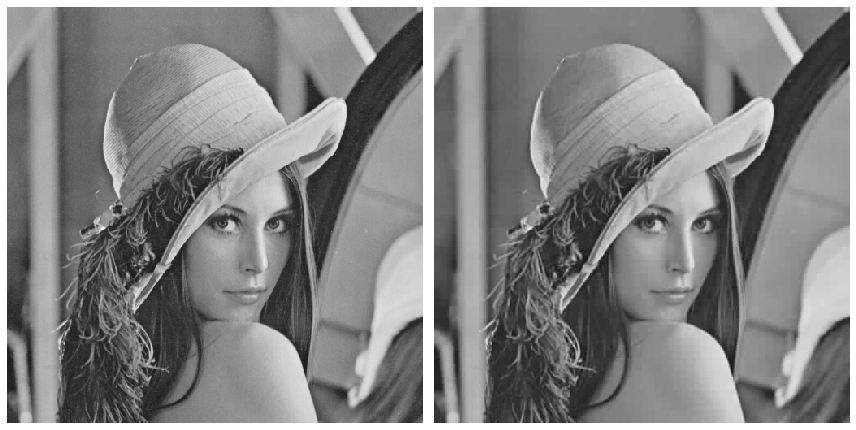

In [20]:

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(im, vmin=0, vmax=255, cmap='gray')
axes[1].imshow(decompressed_im, vmin=0, vmax=255, cmap='gray')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena-side-by-side.png'))

# Image frequencies

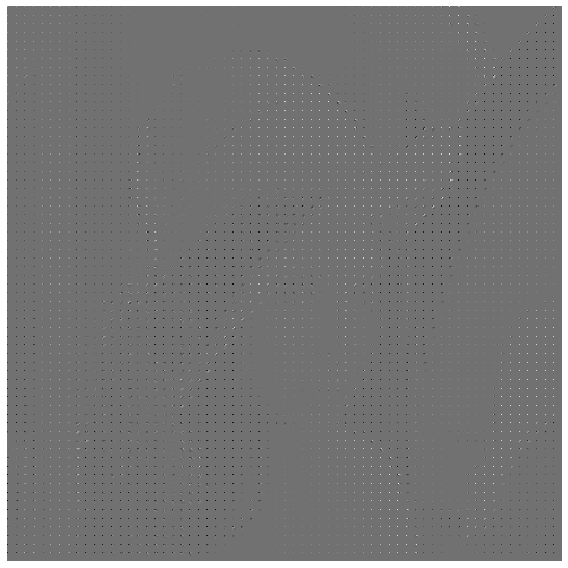

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(compressed_im, cmap='gray')
ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena-freq.png'))

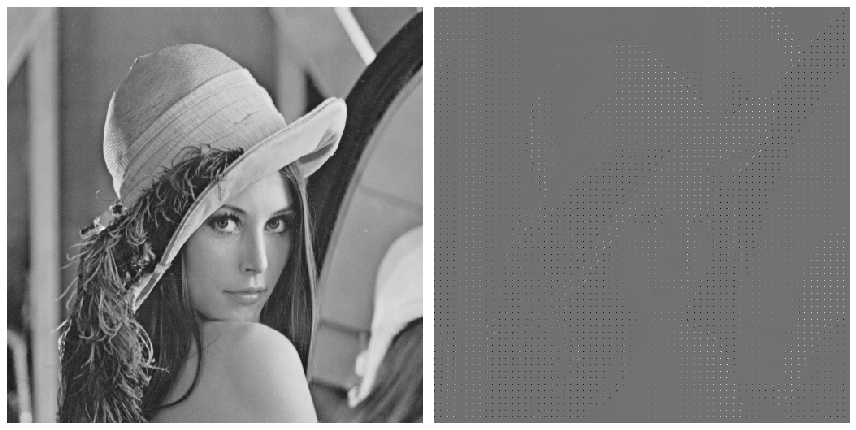

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(im, vmin=0, vmax=255, cmap='gray')
axes[1].imshow(compressed_im, cmap='gray')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
_ = plt.savefig(Path('..', 'images', 'lena-freq-side-by-side.png'))